# Assignment 3

Cristian Piacente 866020 \
Advanced Machine Learning course \
Master's degree in Computer Science @ University of Milan - Bicocca \
A.Y. 2024-25

Design and train a CNN with up to 7000 trainable parameters to obtain the best results on the MNIST dataset.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical

pd.set_option('display.max_columns', None)
keras.utils.set_random_seed(42)

# Inspecting the data

In this section we will load the data, plot both the pixel values distribution and the labels distribution, and also show a few examples.

## Load the data

In [2]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
# Shape of the training data
X_train.shape

(60000, 28, 28)

We have 60000 train images, each one with dimension 28x28.

In [4]:
# Shape of the training labels, to be sure
y_train.shape

(60000,)

In [5]:
# Preview of the labels
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
# Shape of the test data
X_test.shape

(10000, 28, 28)

We have 10000 test images; as before, the dimension of each one is 28x28.

In [7]:
# Shape of the test labels, to be sure
y_test.shape

(10000,)

In [8]:
# Preview of the labels
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Now let's check the distribution of the labels.

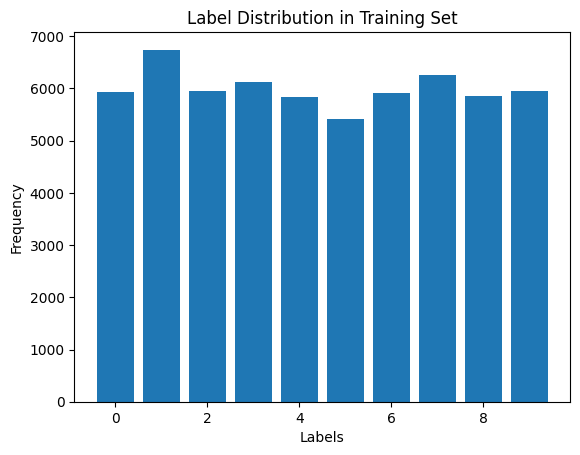

In [9]:
# Distribution of the training labels
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
plt.title('Label Distribution in Training Set')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.show()

In [10]:
unique

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [11]:
print(f'Number of categories: {len(set(y_train))}')

Number of categories: 10


We can see the labels go from 0 to 9.

Let's make sure the same happens on the test data.

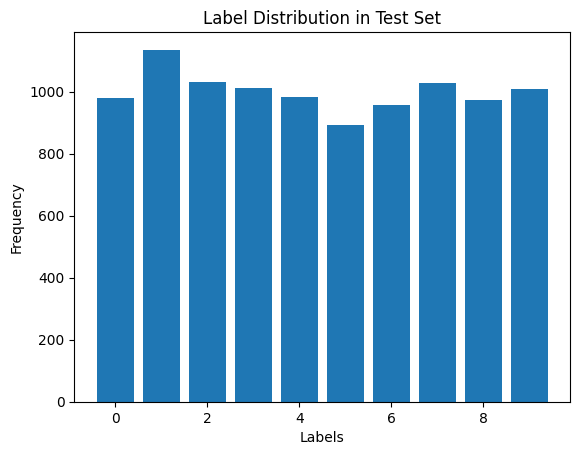

In [12]:
# Distribution of the test labels
unique, counts = np.unique(y_test, return_counts=True)
plt.bar(unique, counts)
plt.title('Label Distribution in Test Set')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.show()

In [13]:
unique

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [14]:
print(f'Number of categories: {len(set(y_test))}')

Number of categories: 10


We confirmed that also the test data has labels from 0 to 9.

Let's also see the distribution of the pixel values in the training set and the test set.

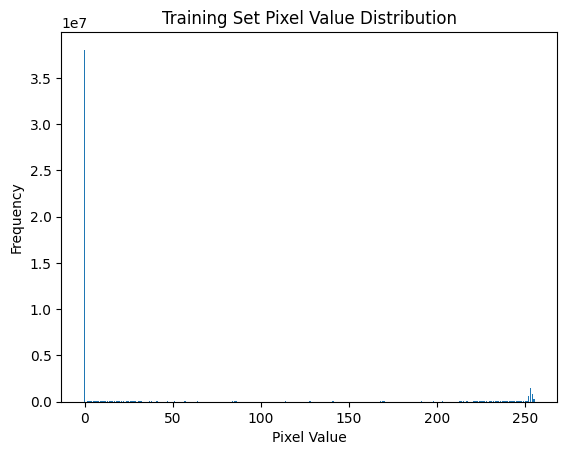

In [15]:
# Distribution of the training set
unique, counts = np.unique(X_train, return_counts=True)
plt.bar(unique, counts)
plt.title('Training Set Pixel Value Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

In [16]:
unique

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

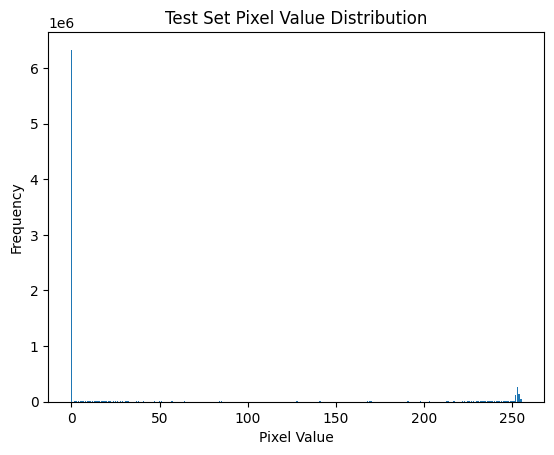

In [17]:
# Distribution of the test set
unique, counts = np.unique(X_test, return_counts=True)
plt.bar(unique, counts)
plt.title('Test Set Pixel Value Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

In [18]:
unique

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

It's not really meaningful: let's apply the logarithm on the y axis (semilog plot).

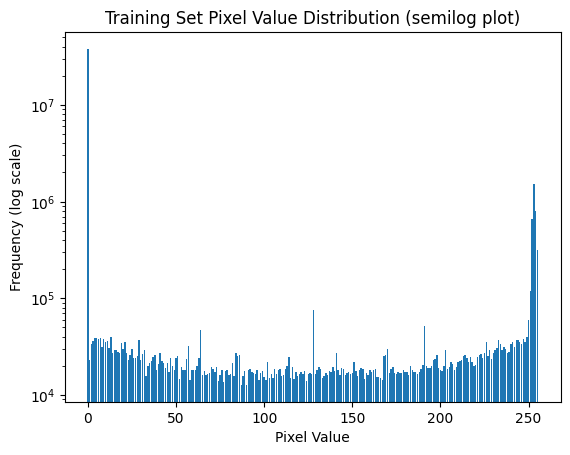

In [19]:
# Distribution of the training set (semilog plot)
unique, counts = np.unique(X_train, return_counts=True)
plt.bar(unique, counts)
plt.title('Training Set Pixel Value Distribution (semilog plot)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency (log scale)')
plt.yscale('log')
plt.show()

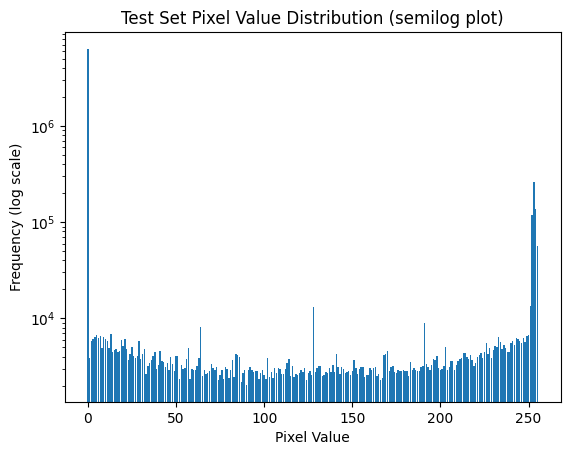

In [20]:
# Distribution of the test set (semilog plot)
unique, counts = np.unique(X_test, return_counts=True)
plt.bar(unique, counts)
plt.title('Test Set Pixel Value Distribution (semilog plot)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency (log scale)')
plt.yscale('log')
plt.show()

We can see the most frequent pixel values are the minimum, that is 0, and the maximum (or a value near it), that is 255, as seen before; let's confirm that these are the min and the max values.

In [21]:
print(f"Min value in training set: {np.min(X_train)}")
print(f"Max value in training set: {np.max(X_train)}")

print(f"Min value in test set: {np.min(X_test)}")
print(f"Max value in test set: {np.max(X_test)}")

Min value in training set: 0
Max value in training set: 255
Min value in test set: 0
Max value in test set: 255


Finally, let's see the first 5 example images, to get a preview:

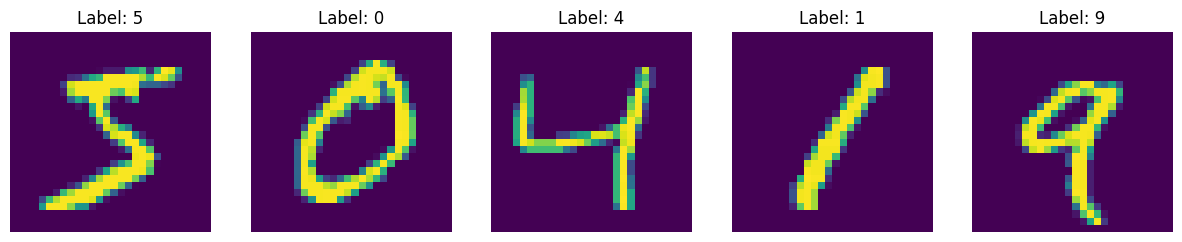

In [22]:
# Plot a few examples
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_train[i])
    ax.set_title(f'Label: {y_train[i]}')
    ax.axis('off')
plt.show()

# Preparing the data

In this section we will perform the preprocessing operations on the data, according to what we saw before during the the data inspection, needed before implementing the models.

Let's normalize the data.

Since the maximum value is 255, we'll divide by it.

Also, we'll add an extra dimension to represent the number of channels.

In [23]:
# Normalize, [0, 255] integers -> [0, 1] float
X_train = X_train / 255.0
X_test = X_test / 255.0

# Add an extra dimension, needed for the models
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

Let's turn the labels into categorical data by applying one-hot encoding, needed for the model's loss function.

In [24]:
# Apply one hot encoding with 10 classes
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

Let's confirm that it worked.

In [25]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [26]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# CNN models

We will start from a Baseline CNN with 34k parameters (the one seen in the lab), and then implement models with fewer than 7k parameters, comparing their performance with the goal of optimizing accuracy:

- Baseline CNN (34k params): establishes benchmark accuracy with a relatively large parameter count
- Model 1 (6k params): a simple architecture with fewer filters and a low parameter count
- Model 2 (5k params): adds more convolutional layers for improved accuracy
- Model 3 (5k params): uses batch normalization and dropout to further improve accuracy

## Common for all models

In [27]:
# The input shape is an image's dimension (28x28, 1 channel) and the number of classes is 10
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]
print(f"Input shape for all the models: {input_shape}")
print(f"Number of classes: {num_classes}")

# The batch size (128) and number of epochs (15) are fixed
batch_size = 128
epochs = 15
print()
print(f"Batch size for all the models: {batch_size}")
print(f"Number of epochs for all the models: {epochs}")

Input shape for all the models: (28, 28, 1)
Number of classes: 10

Batch size for all the models: 128
Number of epochs for all the models: 15


In [28]:
# Functions to plot loss and accuracy curves, useful for later

def plot_loss(history, title="Loss"):
  x_plot = list(range(1,len(history.history["loss"])+1))
  plt.figure()
  plt.title(title)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.plot(x_plot, history.history['loss'])
  plt.plot(x_plot, history.history['val_loss'])
  plt.legend(['Training', 'Validation'])

def plot_accuracy(history, title="Accuracy"):
  x_plot = list(range(1,len(history.history["accuracy"])+1))
  plt.figure()
  plt.title(title)
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.plot(x_plot, history.history['accuracy'])
  plt.plot(x_plot, history.history['val_accuracy'])
  plt.legend(['Training', 'Validation'])

## Notation used

For simplicity, the output shape calculation is not shown (the results can be observed from Keras). 

We'll focus on the number of the trainable params.

### Formula for trainable params in a Convolutional layer

$$
\text{Trainable params} = (K \cdot K \cdot C_{in} + 1) \cdot F
$$

where:
- K * K is the kernel size
- C_in is the number of input channels
- F is the number of filters
- the additional +1 is for the bias term for each filter.

### Formula for trainable params in a Dense layer

$$
\text{Trainable params} = (N_{prev} \cdot N_{out}) + N_{out}
$$

where:
- N_prev is the number of input units from the previous layer
- N_out is the number of output units in the Dense layer
- the additional +N_out is for the bias term for each output unit.

## Baseline CNN with 34k params

The baseline model was designed to provide an upper benchmark for accuracy. 

The architecture includes:
- two Conv2D layers with 32 and 64 filters respectively
- each Conv2D layer is followed by MaxPooling2D to reduce spatial dimensions
- a Dropout layer was added before the Dense layer to help prevent overfitting
- the final Dense layer has 10 units with a softmax activation to predict the digit classes

### Building the CNN

Let's calculate the number of trainable params:

- **Conv2D Layer 1**:
  - F = 32
  - K = 3
  - C_in = 1 (grayscale image)
  - Formula: (K * K * C_in + 1) * F = 10 * 32 = 320

- **Conv2D Layer 2**:
  - F = 64
  - K = 3
  - C_in = 32 (from the first convolutional layer)
  - Formula: (3 * 3 * 32 + 1) * 64 = 18496

- **Dense Layer**:
  - N_prev = 5 * 5 * 64 = 1600
  - N_out = 10
  - Formula: (N_prev * N_out) + N_out = (1600 * 10) + 10 = 16010

The **total trainable parameters** number is: 320 + 18496 + 16010 = 34826

In [29]:
# Baseline Model
model_baseline = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ]
)

# Compile the model
model_baseline.compile(optimizer='adam',
                       loss='categorical_crossentropy', 
                       metrics=['accuracy'])

# Summary of the model
model_baseline.summary()

# Fit the model
history_baseline = model_baseline.fit(
    X_train, 
    y_train, 
    batch_size=batch_size, 
    epochs=epochs, 
    validation_split=0.2
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.7536 - loss: 0.8070 - val_accuracy: 0.9710 - val_loss: 0.0997
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9615 - loss: 0.1272 - val_accuracy: 0.9803 - val_loss: 0.0695
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.9712 - loss: 0.0918 - val_accuracy: 0.9833 - val_loss: 0.0594
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.9761 - loss: 0.0762 - val_accuracy: 0.9852 - val_loss: 0.0530
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.9803 - loss: 0.0648 - val_accuracy: 0.9864 - val_loss: 0.0481
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9805 - loss: 0.0637 - val_accuracy: 0.9872 - val_loss: 0.0461
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9824 - loss: 0.0550 - val_accuracy: 0.9885 - val_loss: 0.0416
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9849 - loss: 0.0489 - val_acc

In [30]:
# Make predictions on the training data
y_pred_train_baseline = model_baseline.predict(X_train)

# Use argmax for converting to a one-hot encoding format
y_pred_indices = np.argmax(y_pred_train_baseline, axis=1)
y_pred_one_hot = np.zeros_like(y_pred_train_baseline)
y_pred_one_hot[np.arange(len(y_pred_indices)), y_pred_indices] = 1
y_pred_train_baseline = y_pred_one_hot

# Calculate the training accuracy
model_baseline_train_accuracy = accuracy_score(y_train, y_pred_train_baseline)

# Display the result
print("(Baseline Model) Training accuracy:", model_baseline_train_accuracy)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
(Baseline Model) Training accuracy: 0.9945333333333334


### Training results

Now that we have trained our model and we've got predictions on the training, let's analyze the accuracy and loss curves, as well as the training accuracy. 

Knowing the following images represent the different scenarios we can have, we can plot the learning curves and then make some considerations.

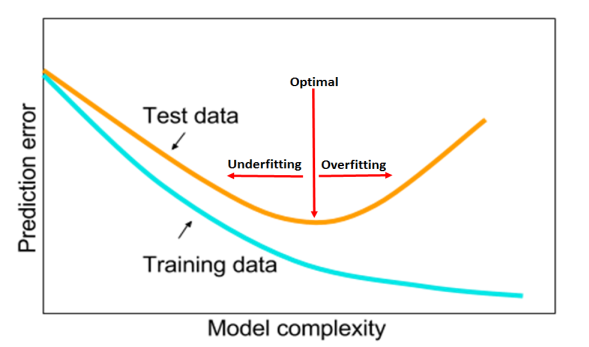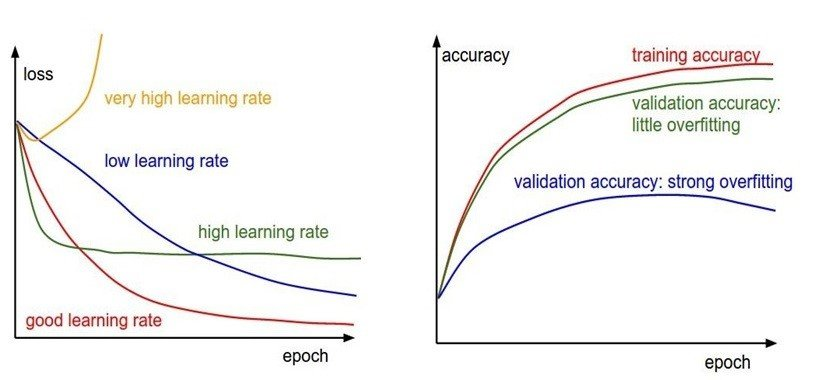

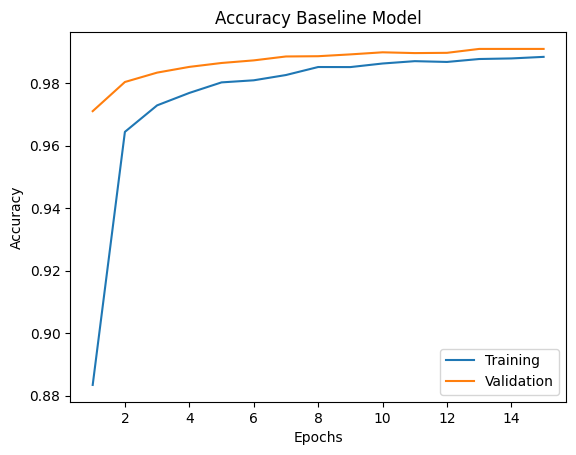

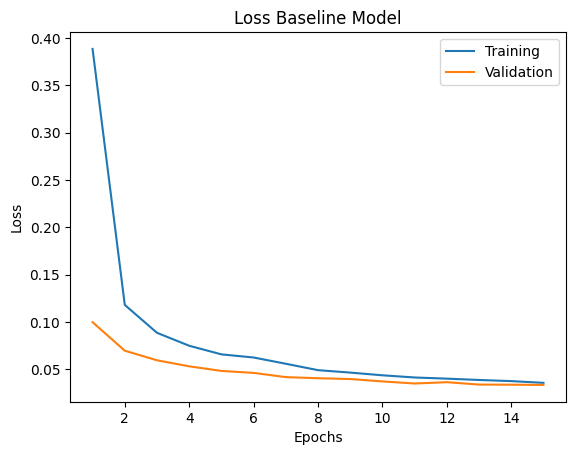

In [31]:
# Baseline Model
plot_accuracy(history_baseline, "Accuracy Baseline Model")
plot_loss(history_baseline, "Loss Baseline Model")

The baseline model achieves high accuracy but at the cost of a large number of trainable parameters (34k). 

The model is well-regularized with dropout, as indicated by the close match between the training and validation curves.

### Test results

In [32]:
# Make predictions on the test data
y_pred_test_baseline = model_baseline.predict(X_test)

# Use argmax for converting to a one-hot encoding format
y_pred_indices = np.argmax(y_pred_test_baseline, axis=1)
y_pred_one_hot = np.zeros_like(y_pred_test_baseline)
y_pred_one_hot[np.arange(len(y_pred_indices)), y_pred_indices] = 1
y_pred_test_baseline = y_pred_one_hot

# Calculate the test accuracy
model_baseline_test_accuracy = accuracy_score(y_test, y_pred_test_baseline)

# Display the result
print("(Baseline Model) Test accuracy:", model_baseline_test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
(Baseline Model) Test accuracy: 0.9916


The test accuracy is slightly lower than the training accuracy, indicating minimal overfitting. 

This demonstrates the model's strong generalization capability. 

The learning curves further indicate good performance, as training and validation accuracy remain closely aligned.

## Model 1

Model 1 was designed with simplicity in mind, containing only one convolutional layer with 4 filters followed by a pooling layer and a fully connected output layer.

Architecture:
- Conv2D layer with 4 filters, kernel size (3, 3), followed by MaxPooling2D
- Flatten layer followed by a Dense output layer with 10 units.

### Building the CNN

Let's calculate the number of trainable params:

- **Conv2D Layer**:
  - F = 4
  - K = 3
  - C_in = 1 (grayscale image)
  - Formula: (K * K * C_in + 1) * F = 10 * 4 = 40

- **Dense Layer**:
  - N_prev = 13 * 13 * 4 = 676
  - N_out = 10 
  - Formula: (N_prev * N_out) + N_out = (676 * 10) + 10 = 6770

The **total trainable parameters** number is: 40 + 6770 = 6810

In [42]:
# Model 1
model_1 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(4, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation='softmax')
    ]
)

# Compile the model
model_1.compile(optimizer='adam',
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

# Summary of the model
model_1.summary()

# Fit the model
history_1 = model_1.fit(
    X_train, 
    y_train, 
    batch_size=batch_size, 
    epochs=epochs, 
    validation_split=0.2
)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 4)      │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 13, 13, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 676)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         6,770 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,810 (26.60 KB)

 Trainable params: 6,810 (26.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6943 - loss: 1.1148 - val_accuracy: 0.9090 - val_loss: 0.3212
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9032 - loss: 0.3334 - val_accuracy: 0.9186 - val_loss: 0.2894
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9124 - loss: 0.3031 - val_accuracy: 0.9213 - val_loss: 0.2775
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9158 - loss: 0.2892 - val_accuracy: 0.9239 - val_loss: 0.2697
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9183 - loss: 0.2792 - val_accuracy: 0.9259 - val_loss: 0.2628
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9206 - loss: 0.2703 - val_accuracy: 0.9280 - val_loss: 0.2557
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9237 - loss: 0.2612 - val_accuracy: 0.9300 - val_loss: 0.2476
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9263 - loss: 0.2513 - val_accuracy: 0.

In [43]:
# Make predictions on the training data
y_pred_train_1 = model_1.predict(X_train)

# Use argmax for converting to a one-hot encoding format
y_pred_indices = np.argmax(y_pred_train_1, axis=1)
y_pred_one_hot = np.zeros_like(y_pred_train_1)
y_pred_one_hot[np.arange(len(y_pred_indices)), y_pred_indices] = 1
y_pred_train_1 = y_pred_one_hot

# Calculate the training accuracy
model_1_train_accuracy = accuracy_score(y_train, y_pred_train_1)

# Display the result
print("(Model 1) Training accuracy:", model_1_train_accuracy)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
(Model 1) Training accuracy: 0.96135


### Training results

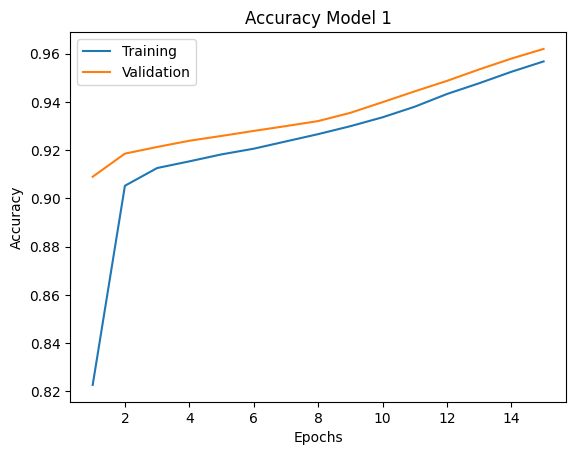

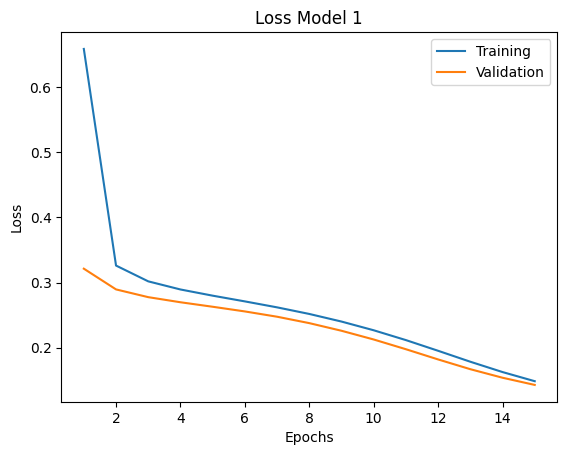

In [44]:
# Model 1
plot_accuracy(history_1, "Accuracy Model 1")
plot_loss(history_1, "Loss Model 1")

Model 1 serves as a simple proof of concept. 

It achieves relatively lower accuracy but has a significantly reduced parameter count. 

The model struggles with capacity, as shown in the learning curves, where the training and validation accuracy do not converge to high levels, indicating that the model lacks sufficient complexity to capture all relevant features. 

The gap between training and test accuracy is minimal, which indicates that the model is not overfitting but it has limited capacity.

### Test results

In [45]:
# Make predictions on the test data
y_pred_test_1 = model_1.predict(X_test)

# Use argmax for converting to a one-hot encoding format
y_pred_indices = np.argmax(y_pred_test_1, axis=1)
y_pred_one_hot = np.zeros_like(y_pred_test_1)
y_pred_one_hot[np.arange(len(y_pred_indices)), y_pred_indices] = 1
y_pred_test_1 = y_pred_one_hot

# Calculate the test accuracy
model_1_test_accuracy = accuracy_score(y_test, y_pred_test_1)

# Display the result
print("(Model 1) Test accuracy:", model_1_test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(Model 1) Test accuracy: 0.958


Model 1 shows similar training and test accuracy, indicating that it is not overfitting, but both training and validation curves fail to reach high accuracy levels. 

The model lacks complexity for better accuracy.

## Model 2

Model 2 was designed to add an additional convolutional layer to improve feature extraction while keeping the parameter count low.

Architecture:
- first Conv2D layer with 8 filters and a MaxPooling2D layer
- second Conv2D layer with 16 filters and another MaxPooling2D
- Flatten layer followed by a Dense output layer.

### Building the CNN

Let's calculate the number of trainable params:

- **Conv2D Layer 1**:
  - F = 8
  - K = 3
  - C_in = 1 (grayscale image)
  - Formula: (K * K * C_in + 1) * F = 10 * 8 = 80

- **Conv2D Layer 2**:
  - F = 16
  - K = 3
  - C_in = 8 (from the first convolutional layer)
  - Formula: (3 * 3 * 8 + 1) * 16 = 1168

- **Dense Layer**:
  - N_prev = 5 * 5 * 16 = 400
  - N_out = 10
  - Formula: (N_prev * N_out) + N_out = (400 * 10) + 10 = 4010

The **total trainable parameters** number is: 80 + 1168 + 4010 = 5258

In [46]:
# Model 2
model_2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(8, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(16, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(num_classes, activation='softmax')
    ]
)

# Compile the model
model_2.compile(optimizer='adam',
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

# Summary of the model
model_2.summary()

# Fit the model
history_2 = model_2.fit(
    X_train, 
    y_train, 
    batch_size=batch_size, 
    epochs=epochs, 
    validation_split=0.2
)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         4,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,258 (20.54 KB)

 Trainable params: 5,258 (20.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6912 - loss: 1.0596 - val_accuracy: 0.9537 - val_loss: 0.1652
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9531 - loss: 0.1571 - val_accuracy: 0.9687 - val_loss: 0.1079
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9684 - loss: 0.1068 - val_accuracy: 0.9740 - val_loss: 0.0888
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9741 - loss: 0.0859 - val_accuracy: 0.9763 - val_loss: 0.0792
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9779 - loss: 0.0739 - val_accuracy: 0.9782 - val_loss: 0.0735
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9795 - loss: 0.0660 - val_accuracy: 0.9793 - val_loss: 0.0692
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9813 - loss: 0.0600 - val_accuracy: 0.9802 - val_loss: 0.0659
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9831 - loss: 0.0553 - val_accuracy: 0.

In [47]:
# Make predictions on the training data
y_pred_train_2 = model_2.predict(X_train)

# Use argmax for converting to a one-hot encoding format
y_pred_indices = np.argmax(y_pred_train_2, axis=1)
y_pred_one_hot = np.zeros_like(y_pred_train_2)
y_pred_one_hot[np.arange(len(y_pred_indices)), y_pred_indices] = 1
y_pred_train_2 = y_pred_one_hot

# Calculate the training accuracy
model_2_train_accuracy = accuracy_score(y_train, y_pred_train_2)

# Display the result
print("(Model 2) Training accuracy:", model_2_train_accuracy)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
(Model 2) Training accuracy: 0.98945


### Training results

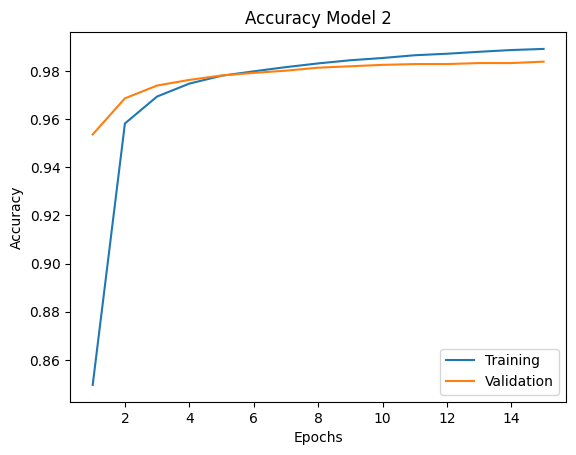

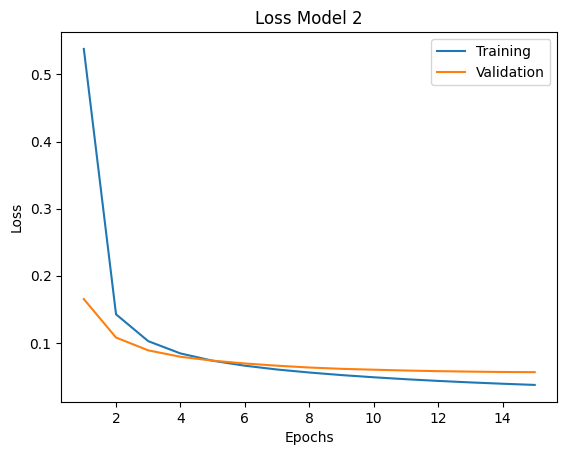

In [48]:
# Model 2
plot_accuracy(history_2, "Accuracy Model 2")
plot_loss(history_2, "Loss Model 2")

Model 2 showed a significant improvement in accuracy by adding a second convolutional layer, allowing for more complex feature extraction. 

The parameter count is still comfortably below the 7k limit. 

The training and validation curves indicate much better learning capacity compared to Model 1, with significantly higher accuracy. The model does not show signs of overfitting, and there is a close match between training and test accuracy, indicating good generalization.

### Test results

In [49]:
# Make predictions on the test data
y_pred_test_2 = model_2.predict(X_test)

# Use argmax for converting to a one-hot encoding format
y_pred_indices = np.argmax(y_pred_test_2, axis=1)
y_pred_one_hot = np.zeros_like(y_pred_test_2)
y_pred_one_hot[np.arange(len(y_pred_indices)), y_pred_indices] = 1
y_pred_test_2 = y_pred_one_hot

# Calculate the test accuracy
model_2_test_accuracy = accuracy_score(y_test, y_pred_test_2)

# Display the result
print("(Model 2) Test accuracy:", model_2_test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
(Model 2) Test accuracy: 0.9853


The difference between training and test accuracy is minimal, suggesting that the model generalizes well. 

The additional convolutional layer helped extract more relevant features, significantly improving the test accuracy compared to Model 1.

## Model 3

Model 3 aimed to further improve accuracy while staying just below 7k trainable parameters. 

Batch normalization and dropout were introduced for better regularization.

Architecture:
- first Conv2D layer with 8 filters, followed by BatchNormalization and MaxPooling2D
- second Conv2D layer with 16 filters, followed by BatchNormalization and MaxPooling2D
- Dropout (0.25) added before the Dense layer to mitigate overfitting
- Dense output layer.

### Building the CNN

Let's calculate the number of trainable params:

- **Conv2D Layer 1**:
  - F = 8
  - K = 3
  - C_in = 1 (grayscale image)
  - Formula: (K * K * C_in + 1) * F = 10 * 8 = 80

- **BatchNormalization Layer 1**:
  - **Non-trainable Params**: 2 * F = 16 (includes moving mean and moving variance, used during inference)
  - **Trainable Params**: 2 * F = 16 (includes gamma and beta, used to adjust the normalized output)

- **Conv2D Layer 2**:
  - F = 16
  - K = 3
  - C_in = 8 (from the first convolutional layer)
  - Formula: (3 * 3 * 8 + 1) * 16 = 1168

- **BatchNormalization Layer 2**:
  - **Non-trainable Params**: 2 * F = 32
  - **Trainable Params**: 2 * F = 32

- **Dense Layer**:
  - N_prev = 5 * 5 * 16 = 400
  - N_out = 10
  - Formula: (N_prev * N_out) + N_out = (400 * 10) + 10 = 4010

The **total trainable parameters** number is: 80 + 16 + 1168 + 32 + 4010 = 5306

(while the **total non-trainable parameters** number is: 16 + 32 = 48)

In [70]:
# Model 3
model_3 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(8, kernel_size=(3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(16, kernel_size=(3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.25),
        layers.Dense(num_classes, activation='softmax')
    ]
)

# Compile the model
model_3.compile(optimizer='adam',
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

# Summary of the model
model_3.summary()

# Fit the model
history_3 = model_3.fit(
    X_train, 
    y_train, 
    batch_size=batch_size, 
    epochs=epochs, 
    validation_split=0.2
)

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 26, 26, 8)      │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 11, 11, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 11, 11, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │         4,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,354 (20.91 KB)

 Trainable params: 5,306 (20.73 KB)

 Non-trainable params: 48 (192.00 B)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.6705 - loss: 1.1764 - val_accuracy: 0.9093 - val_loss: 0.3571
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9462 - loss: 0.1722 - val_accuracy: 0.9748 - val_loss: 0.0914
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9633 - loss: 0.1170 - val_accuracy: 0.9793 - val_loss: 0.0717
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.9701 - loss: 0.0942 - val_accuracy: 0.9812 - val_loss: 0.0618
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9762 - loss: 0.0790 - val_accuracy: 0.9838 - val_loss: 0.0573
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9771 - loss: 0.0720 - val_accuracy: 0.9838 - val_loss: 0.0548
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.9789 - loss: 0.0641 - val_accuracy: 0.9836 - val_loss: 0.0540
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9806 - loss: 0.0615 - va

In [71]:
# Make predictions on the training data
y_pred_train_3 = model_3.predict(X_train)

# Use argmax for converting to a one-hot encoding format
y_pred_indices = np.argmax(y_pred_train_3, axis=1)
y_pred_one_hot = np.zeros_like(y_pred_train_3)
y_pred_one_hot[np.arange(len(y_pred_indices)), y_pred_indices] = 1
y_pred_train_3 = y_pred_one_hot

# Calculate the training accuracy
model_3_train_accuracy = accuracy_score(y_train, y_pred_train_3)

# Display the result
print("(Model 3) Training accuracy:", model_3_train_accuracy)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step
(Model 3) Training accuracy: 0.9913


### Training results

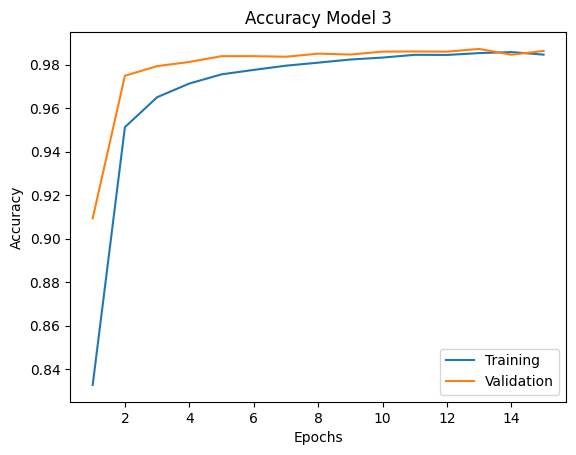

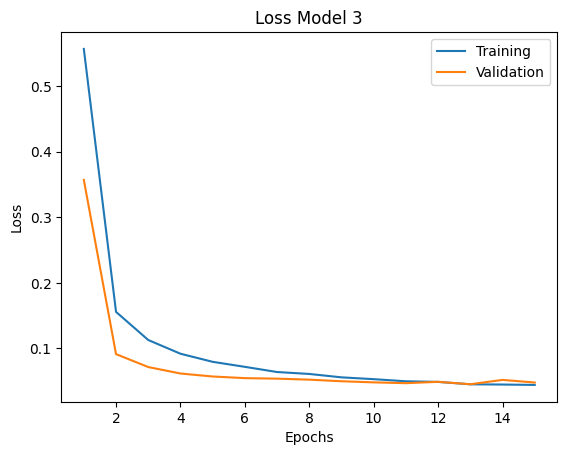

In [73]:
# Model 3
plot_accuracy(history_3, "Accuracy Model 3")
plot_loss(history_3, "Loss Model 3")

Model 3 demonstrated the highest accuracy among the models with fewer than 7k parameters. 

Adding BatchNormalization after each convolutional layer stabilized training and accelerated convergence, as observed in the learning curves. 

The addition of Dropout (0.25) also helped in preventing overfitting, which can be seen in the close match between training and validation accuracy. 

The generalization capability is strong, as indicated by the similarity.

### Test results

In [74]:
# Make predictions on the test data
y_pred_test_3 = model_3.predict(X_test)

# Use argmax for converting to a one-hot encoding format
y_pred_indices = np.argmax(y_pred_test_3, axis=1)
y_pred_one_hot = np.zeros_like(y_pred_test_3)
y_pred_one_hot[np.arange(len(y_pred_indices)), y_pred_indices] = 1
y_pred_test_3 = y_pred_one_hot

# Calculate the test accuracy
model_3_test_accuracy = accuracy_score(y_test, y_pred_test_3)

# Display the result
print("(Model 3) Test accuracy:", model_3_test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
(Model 3) Test accuracy: 0.9879


Model 3 has a close match between training and test accuracy, indicating excellent generalization. 

The use of BatchNormalization and Dropout helped prevent overfitting while allowing the model to achieve high accuracy. 

The model approaches the performance of the baseline, with much fewer parameters.

## Final considerations

According to what we saw:

- **Baseline Model**: The learning curves indicate excellent performance with both training and validation accuracy reaching over 0.99, with minimal signs of overfitting. This model sets the benchmark in terms of accuracy but uses a large number of parameters.
- **Model 1**: The learning curves for Model 1 show a significant gap between this simple model and the baseline. The training accuracy converges around 0.96, while the validation accuracy is close, indicating that the model's limited capacity restricts its ability to reach higher accuracy. There is insufficient model capacity.
- **Model 2**: Learning curves indicate a significant jump in both training and validation accuracy compared to Model 1, showing the benefits of adding a second convolutional layer. Overfitting is not present, but the gap between this model and the baseline suggests room for further improvement. The close training and test accuracy values reflect good generalization.
- **Model 3**: The learning curves for Model 3 show that both training and validation accuracy are very close to the baseline. The use of BatchNormalization and Dropout improved the training process, stabilized learning, and helped avoid overfitting. This model achieves a great balance of accuracy and parameter count, with minimal difference between training and test accuracy, indicating excellent generalization.

In [76]:
# Retrieve the number of trainable params for each model
model_baseline_trainable_params = np.sum([np.prod(v.shape) for v in model_baseline.trainable_weights])
model_1_trainable_params = np.sum([np.prod(v.shape) for v in model_1.trainable_weights])
model_2_trainable_params = np.sum([np.prod(v.shape) for v in model_2.trainable_weights])
model_3_trainable_params = np.sum([np.prod(v.shape) for v in model_3.trainable_weights])

# Accuracy metrics and number of trainable parameters for each model
data = {
    'Model': ['Baseline (34k)', 'Model 1', 'Model 2', 'Model 3'],
    'Trainable params': [model_baseline_trainable_params,
                          model_1_trainable_params,
                          model_2_trainable_params,
                          model_3_trainable_params],
    'Training Accuracy': [model_baseline_train_accuracy,
                          model_1_train_accuracy,
                          model_2_train_accuracy,
                          model_3_train_accuracy],
    'Test Accuracy': [model_baseline_test_accuracy,
                      model_1_test_accuracy,
                      model_2_test_accuracy,
                      model_3_test_accuracy]
}

# Create DataFrame
pd.DataFrame(data)

,Model,Trainable params,Training Accuracy,Test Accuracy
0,Baseline (34k),34826,0.994533,0.9916
1,Model 1,6810,0.961350,0.9580
2,Model 2,5258,0.989450,0.9853
3,Model 3,5306,0.991300,0.9879


The progression of models shows that careful design choices, such as adding more convolution layers, using BatchNormalization, and employing Dropout, **all contributed** significantly **to** improving model **accuracy** while keeping the **parameter count below 7k**.

Here are some final considerations:
- **Baseline Model**: Provided a benchmark with 34826 parameters and 0.9916 test accuracy. It represents the upper end of what can be achieved in accuracy but is **not efficient in terms of parameter count**.
- **Model 1**: Was an intentionally simple model with 6810 trainable parameters, achieving 0.9580 test accuracy. This served as the **starting point** for model improvement. The model lacks sufficient capacity.
- **Model 2**: Introduced an **additional convolution layer**, which resulted in a significant improvement in test accuracy to 0.9853, with only 5258 parameters. It demonstrated better generalization compared to Model 1.
- **Model 3**: Used BatchNormalization and Dropout, achieving 0.9879 test accuracy with 5306 parameters, the **highest accuracy under 7k parameters**. It demonstrated excellent generalization capabilities.

**Model 3 represents the best trade-off** between complexity, generalization capabilities, and accuracy. It achieves a performance that is **very close to the baseline model, while using 85% fewer parameters**, making it an optimal choice for a resource-constrained environment. The added batch normalization and dropout were effective in stabilizing training and avoiding overfitting, helping to achieve near-baseline accuracy with far fewer parameters.